In [1]:
!pip install ta-lib

     |████████████████████████████████| 727kB 2.8MB/s 
  ERROR: Failed building wheel for ta-lib
  Running setup.py clean for ta-lib
Failed to build ta-lib
    Running setup.py install for ta-lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ik6flwm1/ta-lib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ik6flwm1/ta-lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-1ty5j3ay/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import talib as t
from sklearn.ensemble import RandomForestClassifier

F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [0]:
df = pd.read_csv("./Data/JustDial_CSV.csv",index_col="DateTime")

In [0]:
df.index = pd.to_datetime(df.index)
df.head()

,open,high,low,close,volume
DateTime,,,,,
2015-02-02 09:15:00+05:30,1555.10,1564.70,1555.10,1564.70,821
2015-02-02 09:16:00+05:30,1564.70,1564.70,1556.60,1563.25,324
2015-02-02 09:17:00+05:30,1563.25,1563.25,1557.45,1560.00,245
2015-02-02 09:18:00+05:30,1556.65,1559.00,1556.20,1558.70,221
2015-02-02 09:19:00+05:30,1558.70,1559.00,1557.50,1557.50,80


In [0]:
df["sma5"] = t.SMA(df.close.values, timeperiod=5)
df["sma8"] = t.SMA(df.close.values, timeperiod=8)
df["sma13"] = t.SMA(df.close.values, timeperiod=13)
df["sma15"] = t.SMA(df.close.values, timeperiod=15)
df["sma24"] = t.SMA(df.close.values, timeperiod=24)
df["sma32"] = t.SMA(df.close.values, timeperiod=32)
df["sma46"] = t.SMA(df.close.values, timeperiod=46)
df["sma50"] = t.SMA(df.close.values, timeperiod=50)

In [0]:
df["EMA5"] = t.EMA(df.close.values, timeperiod=5)
df["EMA8"] = t.EMA(df.close.values, timeperiod=8)
df["EMA13"] = t.EMA(df.close.values, timeperiod=13)
df["EMA15"] = t.EMA(df.close.values, timeperiod=15)
df["EMA24"] = t.EMA(df.close.values, timeperiod=24)
df["EMA32"] = t.EMA(df.close.values, timeperiod=32)
df["EMA46"] = t.EMA(df.close.values, timeperiod=46)
df["EMA50"] = t.EMA(df.close.values, timeperiod=50)

In [0]:
bb = []
tp = [5,8,13,15,24,32,46,50]
for i in range(8):
    u,m,l = t.BBANDS(df.close.values,timeperiod = tp[i])
    bb.append((u-l)/m)
    
df["bb5"] = bb[0]
df["bb8"] = bb[1]
df["bb13"] = bb[2]
df["bb15"] = bb[3]
df["bb24"] = bb[4]
df["bb32"] = bb[5]
df["bb46"] = bb[6]
df["bb50"] = bb[7]

In [0]:
df[50:58]

,open,high,low,close,volume,sma5,sma8,sma13,sma15,sma24,...,EMA46,EMA50,bb5,bb8,bb13,bb15,bb24,bb32,bb46,bb50
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-02-02 10:05:00+05:30,1568.00,1569.0,1567.60,1567.65,348,1567.88,1568.53750,1569.719231,1570.476667,1566.675000,...,1561.965435,1561.378961,0.000384,0.002974,0.005645,0.007204,0.015329,0.018782,0.018705,0.018037
2015-02-02 10:06:00+05:30,1567.65,1569.0,1565.30,1565.95,421,1567.47,1568.29375,1569.253846,1569.870000,1567.068750,...,1562.134991,1561.558217,0.001971,0.003685,0.005915,0.007026,0.014349,0.018222,0.018778,0.018103
2015-02-02 10:07:00+05:30,1566.90,1566.9,1564.95,1565.95,900,1567.06,1567.66250,1568.715385,1569.216667,1567.462500,...,1562.297332,1561.730444,0.002332,0.003083,0.005634,0.006189,0.013221,0.017585,0.018826,0.018174
2015-02-02 10:08:00+05:30,1566.00,1566.9,1566.00,1566.20,247,1566.75,1567.18750,1568.207692,1568.830000,1567.908333,...,1562.463403,1561.905721,0.002271,0.002309,0.004991,0.006159,0.011620,0.016981,0.018883,0.018227
2015-02-02 10:09:00+05:30,1566.20,1566.9,1565.55,1565.60,414,1566.27,1566.88750,1567.638462,1568.340000,1568.368750,...,1562.596875,1562.050594,0.001828,0.002503,0.003837,0.005793,0.009309,0.016488,0.018926,0.018223
2015-02-02 10:10:00+05:30,1565.60,1566.4,1565.00,1565.00,732,1565.74,1566.51250,1567.461538,1567.820000,1568.481250,...,1562.699136,1562.166257,0.001064,0.002692,0.004237,0.005295,0.008925,0.015851,0.018571,0.018258
2015-02-02 10:11:00+05:30,1564.95,1566.4,1564.95,1566.40,457,1565.83,1566.34375,1567.346154,1567.380000,1568.500000,...,1562.856620,1562.332286,0.001261,0.002413,0.004282,0.004002,0.008893,0.015138,0.018416,0.018301
2015-02-02 10:12:00+05:30,1566.40,1566.5,1566.00,1566.50,809,1565.94,1566.15625,1567.000000,1567.326667,1568.668750,...,1563.011657,1562.495726,0.001441,0.001838,0.003351,0.004041,0.008370,0.014344,0.018242,0.018347


In [0]:
df["adx"] = t.ADX(df.high.values, df.low.values, df.close.values, timeperiod = 14)
df["BOP"] = t.BOP(df.open.values, df.high.values, df.low.values, df.close.values)
df["willr"] = t.WILLR(df.high.values, df.low.values, df.close.values, timeperiod=14)
fastk, fastd = t.STOCHRSI(df.close.values, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df["stochrsifastk"] = fastk
df["stochrsifastd"] = fastd

In [0]:
df["rsi8"] = t.RSI(df.close.values, timeperiod=8)
df["rsi14"] = t.RSI(df.close.values, timeperiod=14)
df["rsi24"] = t.RSI(df.close.values, timeperiod=24)
df["rsi36"] = t.RSI(df.close.values, timeperiod=36)

In [0]:
macd, macdsignal, macdhist = t.MACD(df.close.values, fastperiod=12, slowperiod=26, signalperiod=9)
df["macd"] = macd
df["macdsig"] = macdsignal

In [0]:
df = df[50:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425904 entries, 2015-02-02 10:05:00+05:30 to 2019-09-13 15:29:00+05:30
Data columns (total 40 columns):
open             425904 non-null float64
high             425904 non-null float64
low              425904 non-null float64
close            425904 non-null float64
volume           425904 non-null int64
sma5             425904 non-null float64
sma8             425904 non-null float64
sma13            425904 non-null float64
sma15            425904 non-null float64
sma24            425904 non-null float64
sma32            425904 non-null float64
sma46            425904 non-null float64
sma50            425904 non-null float64
EMA5             425904 non-null float64
EMA8             425904 non-null float64
EMA13            425904 non-null float64
EMA15            425904 non-null float64
EMA24            425904 non-null float64
EMA32            425904 non-null float64
EMA46            425904 non-null float64
EMA50            425904 n

In [0]:
df["label"] = df.close < (df.close.shift(-5) ) #- (df.close*0.005))

df.label.replace(True, 1, inplace = True)
df.label.replace(False, 0, inplace = True)


X = df.drop("label",axis=1).values
y = df.label.values

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False, random_state=42)

In [0]:
X[0]

array([ 1.56800000e+03,  1.56900000e+03,  1.56760000e+03,  1.56765000e+03,
        3.48000000e+02,  1.56788000e+03,  1.56853750e+03,  1.56971923e+03,
        1.57047667e+03,  1.56667500e+03,  1.56369063e+03,  1.56129674e+03,
        1.56118200e+03,  1.56812168e+03,  1.56841994e+03,  1.56821867e+03,
        1.56796807e+03,  1.56655950e+03,  1.56532381e+03,  1.56196544e+03,
        1.56137896e+03,  3.83531829e-04,  2.97446848e-03,  5.64528457e-03,
        7.20352628e-03,  1.53287718e-02,  1.87817985e-02,  1.87045844e-02,
        1.80369920e-02,  2.21889157e+01, -2.50000000e-01, -7.12280702e+01,
        0.00000000e+00,  3.66249518e+00,  4.83035159e+01,  5.28237533e+01,
        5.18723765e+01,  5.08590070e+01,  2.05753482e+00,  2.71891121e+00])

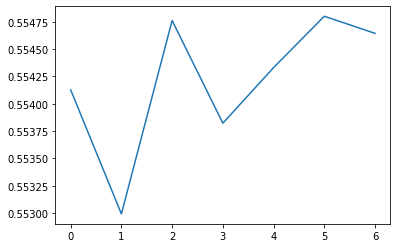

In [0]:
score = []
estimators = [10,15,30,60,80,120,250]
for nest in estimators:
    rf = RandomForestClassifier(n_estimators = nest, max_depth = 5)
    rf.fit(X_train, y_train)
    score.append(rf.score(X_test,y_test))

plt.plot(score)


In [0]:
y_pred = rf.predict(X_test)

In [0]:
f1_score(y_test,y_pred)

0.41204152113723314

In [0]:
rf.score(X_train,y_train)

0.9868145653603102